In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read csv file
df = pd.read_csv('DCOILWTICO.csv')

In [2]:
# Convert 'observation_date' column to datetime format and set as index
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# Rename columns and index
df.index.name = 'Date'
df.rename(columns={'DCOILWTICO': 'Price'}, inplace=True)

# Save formatted data
df.to_csv('oil_price_formatted.csv')
print("\nFormatted data saved as 'oil_price_formatted.csv'")


Formatted data saved as 'oil_price_formatted.csv'


In [3]:
# Missing value statistics
print("\n=== Missing Value Statistics ===")
print(f"Total rows: {len(df)}")
print(f"Missing values: {df['Price'].isna().sum()}")
print(f"Missing value percentage: {df['Price'].isna().sum() / len(df) * 100:.2f}%")

# Drop missing rows
df = df.dropna()
print(f"\nRows after dropping missing values: {len(df)}")
print(f"Missing values after dropping: {df['Price'].isna().sum()}")


=== Missing Value Statistics ===
Total rows: 2610
Missing values: 106
Missing value percentage: 4.06%

Rows after dropping missing values: 2504
Missing values after dropping: 0



=== Descriptive Statistics ===
count    2504.000000
mean       62.825679
std        18.317574
min       -36.980000
25%        49.037500
50%        62.510000
75%        74.530000
max       123.640000
Name: Price, dtype: float64


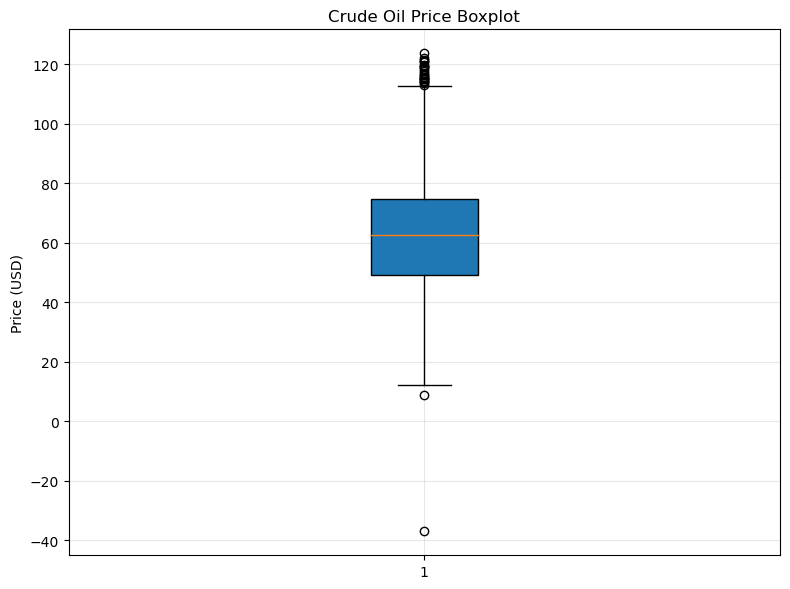


Boxplot saved as 'oil_price_boxplot.png'


In [4]:
# Descriptive statistics
print("\n=== Descriptive Statistics ===")
print(df['Price'].describe())

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], patch_artist=True)
plt.title('Crude Oil Price Boxplot')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('oil_price_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nBoxplot saved as 'oil_price_boxplot.png'")

In [5]:
# Remove rows with negative prices
print(f"\nRows before removing negative prices: {len(df)}")
negative_prices = df[df['Price'] < 0]
print(f"Negative price rows: {len(negative_prices)}")
if len(negative_prices) > 0:
    print("Dates and prices with negative values:")
    print(negative_prices)

df = df[df['Price'] >= 0]
print(f"Rows after removing negative prices: {len(df)}")
print(f"Minimum price after removing negatives: {df['Price'].min()}")

# Save final cleaned data
df.to_csv('oil_price_cleaned.csv')
print("\nFinal cleaned data saved as 'oil_price_cleaned.csv'")



Rows before removing negative prices: 2504
Negative price rows: 1
Dates and prices with negative values:
            Price
Date             
2020-04-20 -36.98
Rows after removing negative prices: 2503
Minimum price after removing negatives: 8.91

Final cleaned data saved as 'oil_price_cleaned.csv'
